### Grunduppgift

Sample with (width, height): (25.0, 32.0) classified as pikachus
Sample with (width, height): (24.2, 31.5) classified as pikachus
Sample with (width, height): (22.0, 34.0) classified as pikachus
Sample with (width, height): (20.5, 34.0) classified as pichus


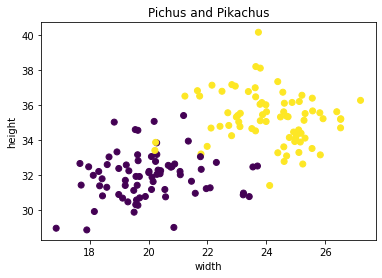

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
import re

dataPoints = []
# Gets the training data from file.
with open("datapoints.txt", "r") as data:

    dataPoints = [points.strip() for points in data] # Strips the data from unwanted line breakers. 
    dataPoints = [points.split(",") for points in dataPoints] # Splits the data in to a list.
    dataPoints = [[float(dataPoints[i][0]), float(dataPoints[i][1]), float(dataPoints[i][2])] for i in range(1, len(dataPoints))] # Parses the data in to floats.
    
# Plots the training points on a graph. 
def plotPoints(dataPoints):
    #plots the point depending on if it's a pichus = 0 or pikachus = 1.
    dataPoint_array = np.array(dataPoints)
    plt.scatter(dataPoint_array[:,0], dataPoint_array[:,1], c= dataPoint_array[:,-1])
    plt.title("Pichus and Pikachus")
    plt.xlabel("width")
    plt.ylabel("height")
plotPoints(dataPoints)

testPoints = []
# Gets the test data from a file.
with open("testpoints.txt", "r") as testdata:
    
    testPoints = [re.findall(r'\d*\.*\d+', points[2:]) for points in testdata.readlines()] # takes all numbers from the line.
    testPoints = [[float(testPoints[i][0]), float(testPoints[i][1])] for i in range(1, len(testPoints))] # Parses the data in to floats.

# Calculates the distance between two points (1x,1y) and (2x,2y).
def calculateDistance (x1, x2, y1, y2):
    # calculate and returns distance between two points.
    return math.sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2))

# Calculates type of pokemon depending on distance. Returns a string with the results.
def calculatePokemon(x, y, trainingData = []):
    #Variable
    shortest_dis = 0 
    poke_type = 0
    poke_name = ""

    # Loops through the training data. 
    for i in range(len(trainingData)):
        x2 = trainingData[i][0]
        y2 = trainingData[i][1]

        distance = calculateDistance(x, x2, y, y2) # Gets the distance.

        # Checks the distance.
        if distance < shortest_dis or i == 0:
            shortest_dis = distance
            poke_type = trainingData[i][2]

    # Gets the pokemone name.
    if poke_type == 0:
        poke_name = "pichus"
    else:
        poke_name = "pikachus"

    return f"Sample with (width, height): ({x}, {y}) classified as {poke_name}"

for i in range(len(testPoints)):
    print(calculatePokemon(testPoints[i][0], testPoints[i][1], dataPoints))



### Uppgift #1

In [70]:
import re

# User Input 
def user_Input():

    while True: # Loops input if a error occurs. 
        # gets user input
        input_value = input("Input the width and height (width,height): ")

        try:
            # checks if input dont have any characters. 
            i = re.findall(r"[^\d' ',.+-]", input_value)
            if(len(i) != 0):

                raise ValueError(f"You need to Input numbers for width and height! not ({input_value})")

            # checks if input is typed right. 
            if not "," in input_value: 

                raise ValueError("You need to divde the width and height with a ','  e.g. (10.2,21.3)")  

            input_value = input_value.split(",") # splits the input --> list 

            input_value = [float(input_value[i]) for i in range(len(input_value))] # Parses the values in to floats.

            #Loops through and checks for value < 0.
            for i in range(len(input_value)):
                                                        
                if not input_value[i] >= 0:                                                            
                    raise ValueError("width and height need to be a positiv number!")
                                                        
            return input_value

        except ValueError as e:
            print(e)

user_value = user_Input()
print(calculatePokemon(user_value[0], user_value[1], dataPoints))

You need to divde the width and height with a ','  e.g. (10.2,21.3)
Sample with (width, height): (12.0, 32.0) classified as pichus


### Uppgift #2

In [44]:
# Calculates the majority vote.
def calculatePokimon_majority(x, y, trainingData = []):
    distance_list = []

    # Loops through the training data. 
    for i in range(len(trainingData)):
        x2 = trainingData[i][0]
        y2 = trainingData[i][1]

        distance_list.append([calculateDistance(x, x2, y, y2), trainingData[i][2]]) # Gets the distance.

    distance_list.sort() # Sorts the list min -> max.
    
    number_pichus = 0
    number_pikachus = 0
    type_number = 0
    
    # checks the 10 first indexs in the list and checks what pokemon.
    for i in range(10):
       
        if distance_list[i][1] == 0:
            number_pichus += 1
        else:
            number_pikachus += 1
    
    type_number += (number_pichus - number_pikachus)
    # Checks for majority and if not takes the nearest point. 
    if type_number == 0:
        if distance_list[0][1] == 0:
            type_number += 1
        else:
            type_number -= 1

    poke_name = ""
    
    # Gets the pokemone name.
    if type_number > 0:
        poke_name = "pichus"
    else:
        poke_name = "pikachus"

    return f"Sample with (width, height): ({x}, {y}) classified as {poke_name} ({number_pichus}/{number_pikachus})"
        
print(calculatePokimon_majority(20.5, 34, dataPoints))
 
    

Sample with (width, height): (20.5, 34) classified as pichus (8/2)


### Bonusuppgift #3

In [45]:
import random
import numpy as np

# Randomly splits datapoints into different lists.
def splitpoints(datapoints = []):

    # Lists and variable
    pikachus_list = []
    pichus_list = []
    test_list = []
    numbers_pikachu = 0
    numbers_pichus = 0

    # Loops until list separation is done 
    while True:
    
        point = random.choice(datapoints) # Randomly takes a point from a index in datapoints.

        # splits the data based on label (50 pikachus, 50 pichus and 25/25)
        if point[:][2] == 0 and numbers_pichus != 50:
            pichus_list.append(point)
            numbers_pichus += 1
        elif point[:][2] == 1 and numbers_pikachu != 50:
            pikachus_list.append(point)
            numbers_pikachu += 1
        else:
            test_list.append(point)

        # Stops the loop when done sorting.
        if len(test_list) == 50:
            break

    # adds two of the lists together. 
    traindata = (pikachus_list + pichus_list)

    return test_list, traindata


### Bonusuppgift #4

Average accuracy = 0.964 (96.4%)


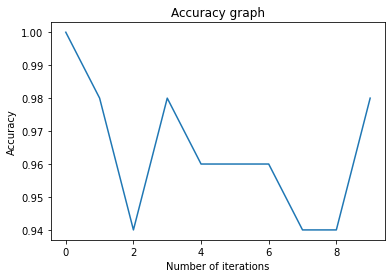

In [46]:
import matplotlib.pyplot as plt

# turns the sting names into numbers.
def gettype(text):

    split_text = text.split(" ")

    if split_text[-1] == "pichus":
        return 0 
    else:
        return 1

# Calculate accuracy.
def calculateAccuracy():

    test_list, traindata = splitpoints(dataPoints) # get the randomly selected test and training data.

    return_data = []

    for i in range(len(test_list)):
        return_data.append(gettype(calculatePokemon(test_list[i][0], test_list[i][1], traindata))) # Calculate pokemon based on training data.  

    #variables
    tp = 0
    tn = 0

    # Loops and divide the tp and tn
    for i in range(len(test_list)):        

        if test_list[i][2] == return_data[i] and test_list[i][2] == 1:
            tp += 1
        elif test_list[i][2] == return_data[i] and test_list[i][2] != 1:
            tn += 1

    accuracy = (tp + tn)/len(test_list) # Calculate accuracy ((TP + TM) / Total).
    return accuracy

accuracy_list = []

for i in range(10):
    accuracy_list.append(calculateAccuracy()) # Loops the accuracy x number of times. 

# plots the accuracy graph.
plt.plot(accuracy_list)
plt.title("Accuracy graph")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

average_accuracy = (sum(accuracy_list) / len(accuracy_list)) # Calculate average accuracy.

print(f"Average accuracy = {average_accuracy:.3f} ({(average_accuracy * 100):.1f}%)")




In [64]:

import re
s = "32.3,   12. 3a#"

h = re.findall(r"[^\d' ',.+-]", s)

print(h)

if re.findall(r"[^,.+-]*[a-z]", s) == None:
    print("e")

if len(h) == 0:
    print("sure")

['a', '#']
